In [3]:
!pip install nltk
!pip install Wordcloud

In [14]:
import nltk
import numpy
import string
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

In [5]:
file_name = "Liewood_Description_2022.txt"  # in R here + data inaugural_speech...

my_file = open(file_name, encoding="utf8") # open the file. 
description = my_file.read() # read content of it and put them in a variable
my_file.close() # close the file

# after that you have access to that file as text in the speech variable you created
print("number of characters:", len(description))
print("-------------------------------------------------------------------------------------------------")
print(description[:500]) # first 500 words

number of characters: 628577
-------------------------------------------------------------------------------------------------
出口丹麦儿童防水罩衣婴儿长袖防脏倒背衣宝宝吃饭围兜女孩秋冬款
儿童硅胶沙滩桶套装 戏水玩具模型挖沙桶 Beach Shovel  Toys Set
丹麦儿童防水反穿衣宝宝围兜吃饭围嘴超软防水防油婴儿罩衣饭兜
New Arrivals Intereseting kids beach sand toy Portable Silicone Sand Bucket Toys Customized Silicone Bucket Beach set
Baby Silicone Sand Bucket Toys Customized Silicone Bucket Beach set Silicone Beach Toys kids
Beach Toys Eco-Friendly Summer Children Beach Toys Sand Bucket Set Bpa Free Safe Silicone Toys
Eco Friendly Summer Soft Beach Toys and Sand Toys Set for Kids Silicone Bucket Pail and Sp


In [6]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
description_tokens = word_tokenize(description)
lower_description_tokens = [word.lower() for word in description_tokens] 
print(lower_description_tokens[0:50])

['出口丹麦儿童防水罩衣婴儿长袖防脏倒背衣宝宝吃饭围兜女孩秋冬款', '儿童硅胶沙滩桶套装', '戏水玩具模型挖沙桶', 'beach', 'shovel', 'toys', 'set', '丹麦儿童防水反穿衣宝宝围兜吃饭围嘴超软防水防油婴儿罩衣饭兜', 'new', 'arrivals', 'intereseting', 'kids', 'beach', 'sand', 'toy', 'portable', 'silicone', 'sand', 'bucket', 'toys', 'customized', 'silicone', 'bucket', 'beach', 'set', 'baby', 'silicone', 'sand', 'bucket', 'toys', 'customized', 'silicone', 'bucket', 'beach', 'set', 'silicone', 'beach', 'toys', 'kids', 'beach', 'toys', 'eco-friendly', 'summer', 'children', 'beach', 'toys', 'sand', 'bucket', 'set', 'bpa']


In [8]:
from nltk.text import Text

text_of_the_description = Text(lower_description_tokens)
print("LIEWOOD", text_of_the_description.concordance("LIEWOOD", lines = 1))
print('silicone', text_of_the_description.concordance('silicone', lines = 1))
print('6Pcs Beach Toy Set', text_of_the_description.concordance('6Pcs Beach Toy Set', lines = 1))
print('SILICONE BUCKET', text_of_the_description.concordance('SILICONE BUCKET', lines = 1))
print('beach', text_of_the_description.concordance('beach', lines = 1))
print('丹麦', text_of_the_description.concordance('丹麦', lines = 1))
print('ins原单', text_of_the_description.concordance('ins原单', lines = 1))
print('organic', text_of_the_description.concordance('organic', lines = 1))
print('sand', text_of_the_description.concordance('sand', lines = 1))

Displaying 1 of 158 matches:
 cute accessories for children spot liewood danish child baby infant bath towel
LIEWOOD None
Displaying 1 of 3310 matches:
eting kids beach sand toy portable silicone sand bucket toys customized silico
silicone None
no matches
6Pcs Beach Toy Set None
no matches
SILICONE BUCKET None
Displaying 1 of 5794 matches:
防脏倒背衣宝宝吃饭围兜女孩秋冬款 儿童硅胶沙滩桶套装 戏水玩具模型挖沙桶 beach shovel toys set 丹麦儿童防水反穿衣宝宝围兜吃饭围嘴超软防
beach None
no matches
丹麦 None
no matches
ins原单 None
Displaying 1 of 6 matches:
danish child baby infant bath towel organic cotton towel hooded sand toy for th
organic None
Displaying 1 of 4850 matches:
new arrivals intereseting kids beach sand toy portable silicone sand bucket to
sand None


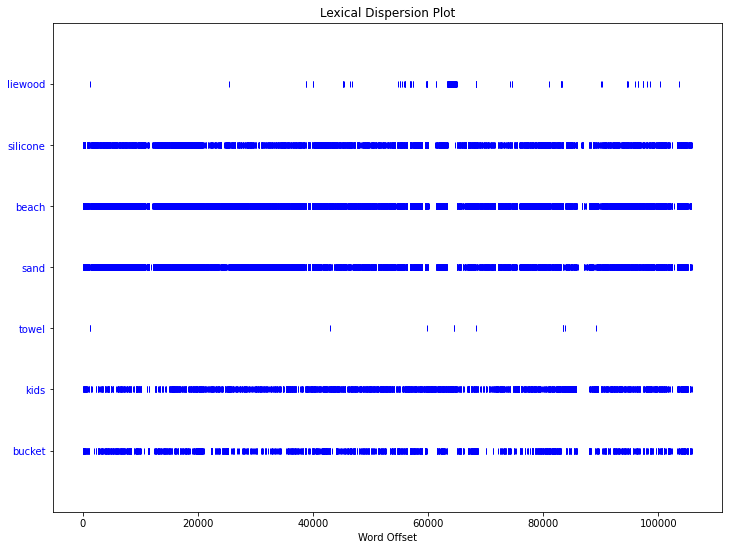

In [9]:
from nltk.draw.dispersion import dispersion_plot

plt.figure(figsize=(12, 9))

targets =['liewood','silicone', 'beach', 'sand', 'towel' ,'kids','bucket']
dispersion_plot(text_of_the_description, targets, ignore_case=True, title='Lexical Dispersion Plot')

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords

#let's have a look what are the words usually discarded:
extra_punctuation_to_remove = ['.', '..','...','....','.....','......', ').', '.,']
individual_letters = list(string.ascii_lowercase)
some_more_words_to_remove = [",","-",")"]


[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + extra_punctuation_to_remove + individual_letters + some_more_words_to_remove)

filtered_text = [word 
                 for word in text_of_the_description 
                 if not word in remove_these]

# note: above broken-down 3-line version could be a one-liner (see below). 
# it's up to you, which format you prefer. above, or this:
# filtered_text = [word for word in corpus_tokens if not word in remove_these]

fdist_filtered = FreqDist(filtered_text)

In [93]:
import nltk
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

# bigram_measures = BigramAssocMeasures()
# finder = BigramCollocationFinder.from_words(text_of_the_description, 5)

In [94]:
word_fd = nltk.FreqDist(filtered_text)
bigram_fd = nltk.FreqDist(nltk.bigrams(filtered_text))
finder = BigramCollocationFinder(word_fd, bigram_fd)
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [95]:
sorted(finder.nbest(bigram_measures.raw_freq, 10))
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:20]

[(('beach', 'toys'), 3156),
 (('digging', 'sand'), 2222),
 (('sand', 'tool'), 2054),
 (('children', 'beach'), 1820),
 (('toy', 'set'), 1671),
 (('tool', 'shovel'), 1538),
 (('summer', 'digging'), 1529),
 (('shovel', 'water'), 1376),
 (('water', 'game'), 1304),
 (('game', 'play'), 1268),
 (('play', 'outdoor'), 1178),
 (('outdoor', 'toy'), 1169),
 (('silicone', 'beach'), 1135),
 (('baby', 'summer'), 1080),
 (('set', 'sandbox'), 1072),
 (('silicone', 'children'), 817),
 (('kit', 'baby'), 784),
 (('boys', 'girls'), 646),
 (('beach', 'toy'), 599),
 (('toys', 'pcs'), 544)]

In [96]:
finder = TrigramCollocationFinder.from_words(filtered_text)
scored = finder.score_ngrams(trigram_measures.raw_freq)

In [97]:
sorted(finder.nbest(trigram_measures.raw_freq, 10))
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:20]

[(('digging', 'sand', 'tool'), 1884),
 (('sand', 'tool', 'shovel'), 1474),
 (('summer', 'digging', 'sand'), 1461),
 (('children', 'beach', 'toys'), 1270),
 (('water', 'game', 'play'), 1162),
 (('tool', 'shovel', 'water'), 1133),
 (('play', 'outdoor', 'toy'), 1117),
 (('game', 'play', 'outdoor'), 1108),
 (('baby', 'summer', 'digging'), 1043),
 (('outdoor', 'toy', 'set'), 1033),
 (('toy', 'set', 'sandbox'), 1023),
 (('shovel', 'water', 'game'), 993),
 (('silicone', 'children', 'beach'), 795),
 (('kit', 'baby', 'summer'), 749),
 (('silicone', 'beach', 'toys'), 684),
 (('beach', 'toys', 'pcs'), 527),
 (('pcs', 'kit', 'baby'), 474),
 (('long', 'sleeve', 'scarf'), 458),
 (('toddler', 'long', 'sleeve'), 454),
 (('art', 'smock', 'feeding'), 451)]

[('beach', 5794), ('toys', 5304), ('sand', 4850), ('toy', 3445), ('baby', 3385), ('silicone', 3310), ('children', 3098), ('summer', 3084), ('set', 3023), ('digging', 2577), ('water', 2542), ('play', 2505), ('kids', 2355), ('shovel', 2352), ('tool', 2290), ('outdoor', 2259), ('game', 1773), ('sandbox', 1691), ('bucket', 1536), ('kit', 1149), ('6pcs', 1005), ('pcs', 785), ('boys', 699), ('girls', 677), ('waterproof', 665), ('toddler', 648), ('bib', 623), ('cute', 584), ('animal', 567), ('long', 560)]


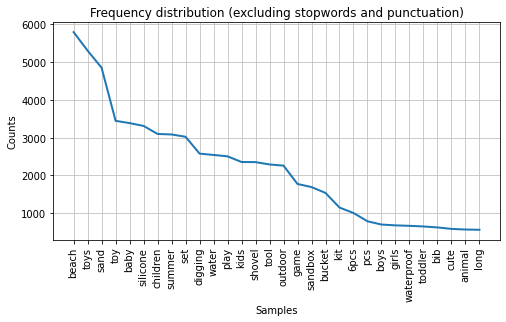

<AxesSubplot:title={'center':'Frequency distribution (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [95]:
print(fdist_filtered.most_common(30))
fdist_filtered.plot(30,title='Frequency distribution (excluding stopwords and punctuation)')

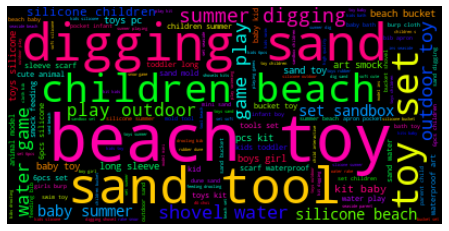

In [88]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
cloud = WordCloud(max_font_size=60,colormap="hsv").generate(' '.join(text_of_the_description)) # generate function?
plt.rcParams["figure.figsize"] = (8,4)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [98]:
from nltk.probability import FreqDist

fdist_filtered.most_common(100)

[('beach', 5794),
 ('toys', 5304),
 ('sand', 4850),
 ('toy', 3445),
 ('baby', 3385),
 ('silicone', 3310),
 ('children', 3098),
 ('summer', 3084),
 ('set', 3023),
 ('digging', 2577),
 ('water', 2542),
 ('play', 2505),
 ('kids', 2355),
 ('shovel', 2352),
 ('tool', 2290),
 ('outdoor', 2259),
 ('game', 1773),
 ('sandbox', 1691),
 ('bucket', 1536),
 ('kit', 1149),
 ('6pcs', 1005),
 ('pcs', 785),
 ('boys', 699),
 ('girls', 677),
 ('waterproof', 665),
 ('toddler', 648),
 ('bib', 623),
 ('cute', 584),
 ('animal', 567),
 ('long', 560),
 ('tools', 550),
 ('smock', 547),
 ('sleeve', 545),
 ('feeding', 535),
 ('kid', 520),
 ('bath', 506),
 ('art', 486),
 ('model', 486),
 ('scarf', 479),
 ('soft', 452),
 ('mold', 436),
 ('seaside', 431),
 ('apron', 414),
 ('pocket', 401),
 ('de', 391),
 ('drooling', 386),
 ('6pcs/set', 354),
 ('sets', 350),
 ('infant', 341),
 ('bibs', 325),
 ('burp', 309),
 ('games', 307),
 ('cloth', 304),
 ('mini', 303),
 ('swimming', 292),
 ('kits', 278),
 ('dune', 264),
 ('ins',